## Ejemplos de Hopkins

In [1]:
from pyclustertend import hopkins
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt


def blobs_examples(
    n_centers, cluster_std, n_samples=4000, p=100, center_box=(-10, 10)
):
    df_spread, labels = make_blobs(
        n_samples=n_samples,
        centers=n_centers,
        n_features=2,
        random_state=42,
        center_box=center_box,
        cluster_std=cluster_std,
    )
    df_spread = pd.DataFrame(df_spread, columns=["x", "y"])
    plt.scatter(df_spread.x, df_spread.y, c=labels)
    plt.title(f"H = {1-hopkins(df_spread, p)}")
    plt.tight_layout()

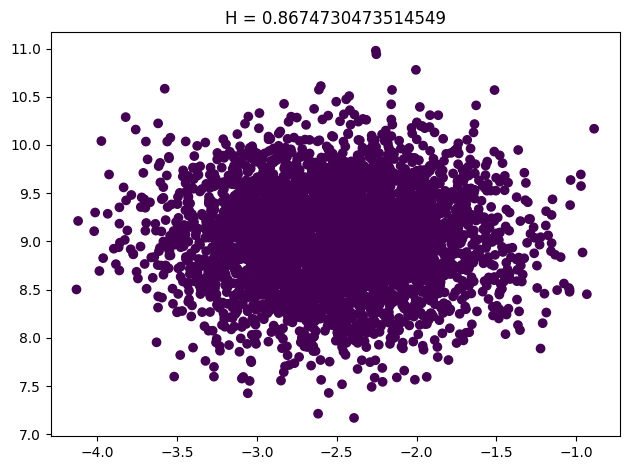

In [2]:
## Una sola nube, muy compacta...
blobs_examples(n_centers=1, cluster_std=0.5, n_samples=4000, p=100)

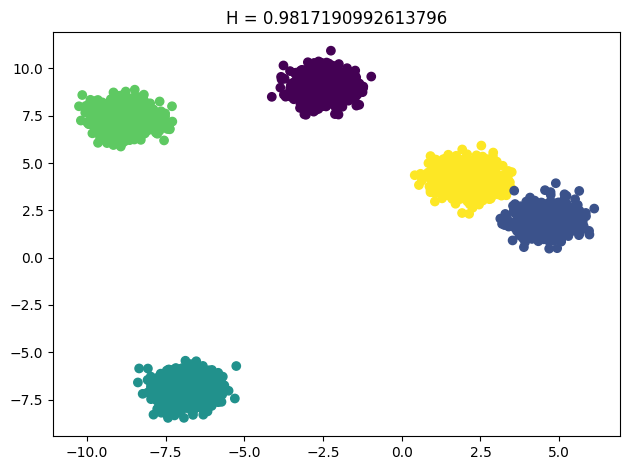

In [3]:
## Muchos nubes muy compactos...
blobs_examples(n_centers=5, cluster_std=0.5, n_samples=4000, p=100)

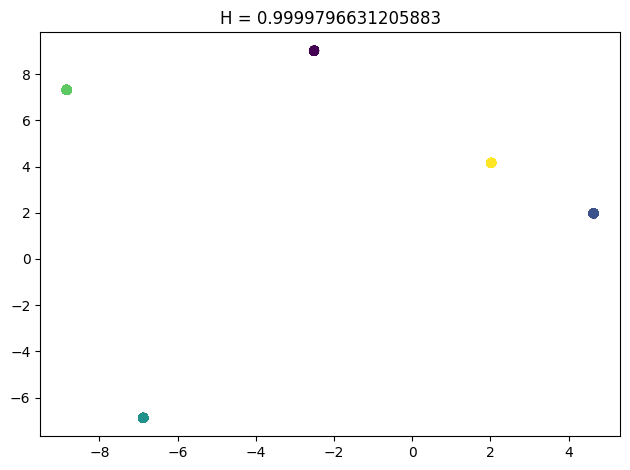

In [4]:
## Muchas nubes extremadamente compactos
blobs_examples(n_centers=5, cluster_std=0.001, n_samples=4000, p=100)

> En este caso utilizamos la función `make_blobs` para simular clusters ficticios. Los clusters siempre son esféricos, es por eso que el Hopkins tiende a dar valores bastante buenos. Aunque, dependiendo de qué tan compacto sea la nube tiende a 1 de manera muy fuerte.

In [5]:
import numpy as np

np.random.seed(0)


def random_examples(n_samples=4000, p=100):
    df_random = pd.DataFrame(
        np.random.rand(n_samples, 2), columns=["x", "y"]
    )
    plt.scatter(df_random.x, df_random.y)
    plt.title(f"H = {1-hopkins(df_random, p)}")
    plt.tight_layout()

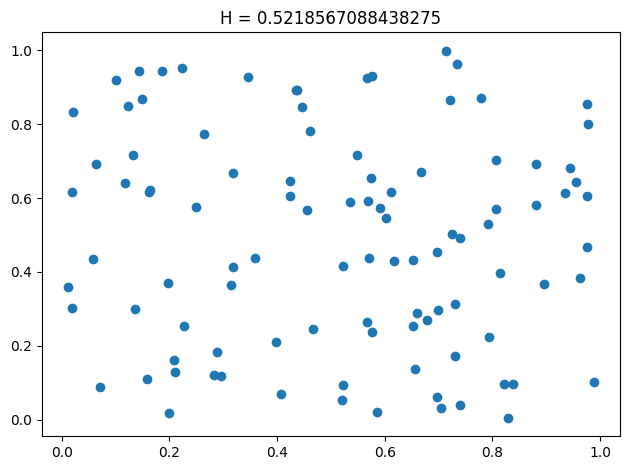

In [6]:
## Puntos más dispersos
random_examples(n_samples=100, p=10)

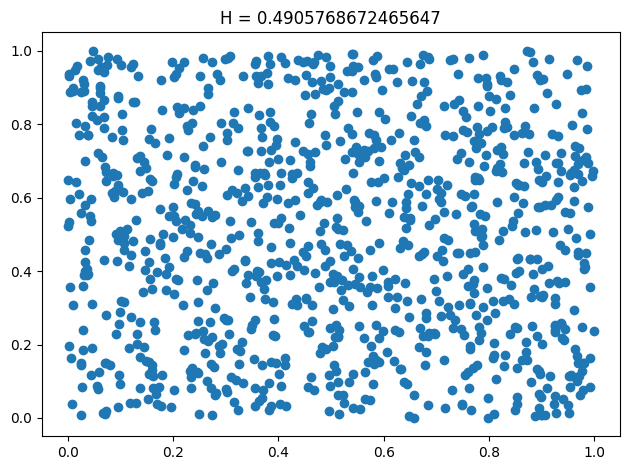

In [7]:
## Más denso, pero aún aleatorio...
random_examples(n_samples=1000, p=100)

> En este caso estamos usando `np.random.rand` para simular sólo valores aleatorios. Se puede ver que entre más *lleno* está el espacio, Hopkins tiende a 0.5.

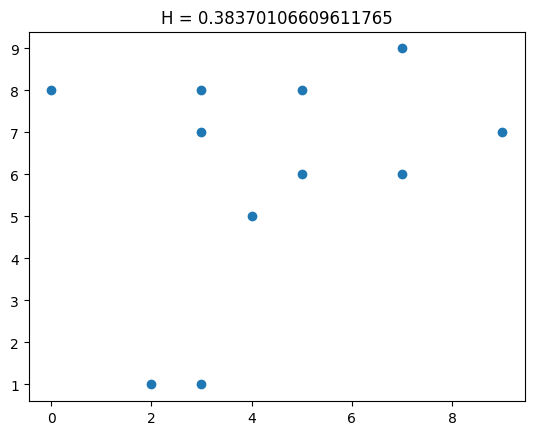

In [8]:
## valores uniformemente distribuidos y con poca tendencia a agruparse (normalmente pocos puntos)
## tienen H más pequeños, pero es díficil obtenerlos...
np.random.seed(0)


def uniform_example(n_samples=10, max_val=10, p=10):
    df_uniform = pd.DataFrame(
        dict(
            x=np.random.randint(0, max_val + 1, size=n_samples),
            y=np.random.randint(0, max_val, size=n_samples),
        )
    )

    plt.scatter(df_uniform.x, df_uniform.y)
    plt.title(f"H = {1-hopkins(df_uniform, p)}")


uniform_example(n_samples=11, max_val=10, p=10)

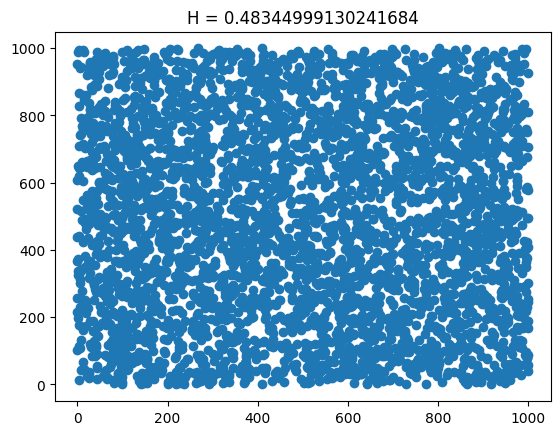

In [9]:
uniform_example(n_samples=4000, max_val=1000, p=100)

> En este caso también estamos forzando aleatoriedad pero con uniformidad de distancia. Para eso simulamos usando `np.random.randint` para generar valores aleatorios pero más o menos equiespaciados uniformemente. Es bien interesante este caso, porque si usamos muchos datos, se tiende a valores completamente aleatorios, es decir H $\sim$ 0.5.